## 11.2 Convolutions

The convolution operation is the main engine of convolutional neural networks (CNNs) and is therefore worth investigating. This exercise will show you how it works and what effect different kernels have on images. You will see how they affect the size of neural networks and you get to play around with an implementation in a browser!

Let's first get a feeling what a single convolution layer does. The following task assumes "same" convolutions, i.e. padding as necessary to keep the output dimensions the same as the input dimensions. It is unusual to have kernels with even side lengths (like 2x2 here), as it leads to asymmetrical padding. It's nonetheless possible and saves us some calculations, so we stick to the convention of padding the left and top border first.

**Task a) Calculate the missing convolution activations with stride 1, apply the ReLU nonlinearity and perform 2x2 max-pooling with stride 2.**

$$ \text{Image:} \ \begin{array}{|c|c|c|c|}
    \hline
    1 & 8 & -16 & 2 \ \\
    \hline
    4 & -4 & 1 & 12 \ \\
    \hline
    8 & -1 & 4 & -2 \ \\
    \hline
    -4 & -12 & 4 & 8 \ \\
    \hline
\end{array}
\quad \text{Kernel:} \ 
\begin{array}{|c|c|}
    \hline
    1 & 0.5 & 2\\
    \hline
    -0.25 & 0.5 & 1 \\
    \hline
    0.5 & 0.25 & 1 \\
    \hline
\end{array}
\quad \text{Result:} \ 
\begin{array}{|c|c|c|c|}
    \hline
    -3.5 & 16 & 4 & -7 \\
    \hline
    10.25 & 16.25 & -3.5 & -1.5 \\
    \hline
    ? & 0 & -10.25 & 19 \\
    \hline
    2.5 & -1.25 & -13 & ? \\
    \hline
\end{array}
 $$
 
$$
\text{After ReLU:} \ 
 \begin{array}{|c|c|c|c|}
    \hline
    ? & ? & ?& ? \ \\
    \hline
    ? & ? & ?& ? \ \\
    \hline
    ? & ? & ?& ? \ \\
    \hline
    ? & ? & ?& ? \ \\
    \hline
\end{array}
\quad \text{After Max Pooling:} \ ?
$$

_Note_: Make sure you know the [difference between convolution and correlation](http://www.imagemagick.org/Usage/convolve/#convolve_vs_correlate). In many machine learning sources these two are treated as the same, because it makes no difference when we learn the kernels. But when solving tasks like this, the result will differ!



**Task b) Implement the valid convolution operation**

Implement _valid_ convolutions using loops in the function below. To provide you with a reference of what the result should look like, an implementation using the scipy.signal convolution is provided. 

images_shape (28, 28, 3)
Kernel 0 shape: 5x5x3
	Result 0 shape: 28x28
	Result 3 shape: 24x24
	Average computation time: 0.00122s
Kernel 1 shape: 5x7x3
	Result 0 shape: 28x26
	Result 3 shape: 24x22
	Average computation time: 0.00154s
Kernel 2 shape: 8x8x3
	Result 0 shape: 25x25
	Result 3 shape: 21x21
	Average computation time: 0.00227s


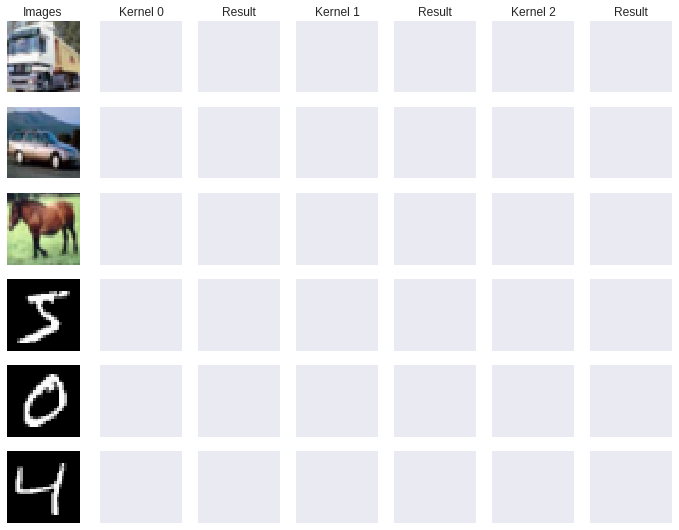

In [18]:
%matplotlib inline
import pickle
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from scipy.signal import convolve as sp_convolve

# Load the prepared data
images = pickle.load(open('images.pkl', 'rb'))
kernels = pickle.load(open('kernels.pkl', 'rb'))
n_images = len(images)
n_kernels = len(kernels)

print("images_shape {}".format(images[4].shape))
# print("images[4] {}".format(images[4]))


def convolve(image, kernel, conv_method='scipy'):
    """
    This function convolves an image with a kernel. 
    conv_method decides which way this will be computed.
    'scipy' will use the scipy.signal convolution, whereas 'loop' will
    use your implementation.
    """
    if conv_method == 'scipy':    
        return sp_convolve(image, kernel, mode='valid').squeeze()
    
    # Get the necessary shape information from image and kernel
    kernel_height, kernel_width, kernel_depth = kernel.shape
    image_height, image_width, image_depth = image.shape
    
     # TODO: figure out the correct output shape
    out_height = np.nan
    out_width = np.nan
    
    # TODO: implement the convolution operation with loops
    if conv_method == 'loop':
        out = np.zeros((out_height, out_width))

        
        
        return out
    
    raise NotImplementedError('Unkown convolution method')
# --- end of the convolution function

# Decide which method to use for convolutions
# TODO: 'loop' should select your method
convolution_method = 'scipy'
    
# Evaluation and plotting code. You can ignore the rest of this code cell
fig, axes = plt.subplots(n_images, n_kernels * 2 + 1, figsize=(n_images * 2, n_kernels * 3))
axes[0][0].set_title('Images')
results = [[None]*n_images]*n_kernels

for i in range(n_images):
        axes[i][0].imshow(images[i], interpolation='nearest')
        for j in range(n_kernels * 2 + 1):
            axes[i][j].grid(False)
            axes[i][j].set_xticks([])
            axes[i][j].set_yticks([])

for kern in range(n_kernels):
    ks = kernels[kern].shape
    print('Kernel {:d} shape: {:d}x{:d}x{:d}'.format(kern, ks[0], ks[1], ks[2]))
    
    col = kern * 2 + 1
    axes[0][col].set_title('Kernel ' + str(kern))
#    axes[0][col].imshow(kernels[kern], interpolation='nearest')
    axes[0][col + 1].set_title('Result')
    
    t_start = time.time()
    
    for i in range(n_images):
        results[kern][i] = convolve(images[i], kernels[kern], conv_method=convolution_method)
        
    duration = time.time() - t_start
        
    for i in range(n_images):
        normalized = np.maximum(results[kern][i], 0.)
#        axes[i][col + 1].imshow(normalized, interpolation='nearest', cmap='Greys_r')
#        if i > 0:
#            axes[i][col].set_visible(False)

    i0s = results[kern][0].shape
    i3s = results[kern][3].shape
    print('\tResult 0 shape: {:d}x{:d}'.format(i0s[0], i0s[1]))
    print('\tResult 3 shape: {:d}x{:d}'.format(i3s[0], i3s[1]))
    print('\tAverage computation time: {:.5f}s'.format(duration / n_images))
pass

**Q 9.1.1: What effect do the different kernels have on the images? How useful would they be for the task of image classification?**

------

**Q 9.1.2: How many weights would each kernel have, if they were trained as part of a convolutional neural network?**

--------

Take a look at the convolutional filters of the first layer in the seminal [AlexNet](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf):
![](weights.jpeg)
**Q 9.1.3: Given your experience in the first task, what do these kernels detect?**


---

**Bonus: Task d) ConvNetJS**

Andrej Karpathy created an [implementation of convolutional networks](http://cs.stanford.edu/people/karpathy/convnetjs/) for your browser in JavaScript, that works surprisingly well. Feel free to play around with it!

_Hint:_ You can use it to get the solution for task c)